# Heart Disease Classification Project
This project implements machine learning classification algorithms to detect heart attack risk based on patient health data.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy import stats

# Scikit-learn modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import jaccard_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## 2. Load and Explore Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 3. Feature Selection Using Correlation
Select features that have at least 0.2 correlation with the target variable (output).
This helps reduce dimensionality and remove irrelevant features.

In [6]:
cor_matrix = df.corr()
selected_features = cor_matrix[abs(cor_matrix["output"]) >= 0.2].index.tolist()
cdf = df[selected_features]

print(cdf)

     age  sex  cp  thalachh  exng  oldpeak  slp  caa  thall  output
0     63    1   3       150     0      2.3    0    0      1       1
1     37    1   2       187     0      3.5    0    0      2       1
2     41    0   1       172     0      1.4    2    0      2       1
3     56    1   1       178     0      0.8    2    0      2       1
4     57    0   0       163     1      0.6    2    0      2       1
..   ...  ...  ..       ...   ...      ...  ...  ...    ...     ...
298   57    0   0       123     1      0.2    1    0      3       0
299   45    1   3       132     0      1.2    1    0      3       0
300   68    1   0       141     0      3.4    1    2      3       0
301   57    1   0       115     1      1.2    1    1      3       0
302   57    0   1       174     0      0.0    1    1      2       0

[303 rows x 10 columns]


## 4. Outlier Removal
Remove outliers using Z-score method (|Z| < 3).
This ensures our model isn't skewed by extreme values.

In [7]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))
cdf = cdf[(z_scores < 3).all(axis=1)]

## 5. Data Preparation
Separate features (X) and target (y)

In [8]:
x = cdf.iloc[:, :-1]  # All columns except last
y = cdf.iloc[:, -1]   # Last column (output)

### Normalize features using StandardScaler
Normalization scales features to have mean=0 and standard deviation=1.
This improves convergence for gradient-based algorithms.

In [9]:
#Normalizing
x = x.astype(float)  # Ensure float type
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
print(x)


[[ 0.95463786  0.67044385  1.95823114 ... -2.32766309 -0.713426
  -2.25051566]
 [-1.90965956  0.67044385  0.9925742  ... -2.32766309 -0.713426
  -0.53725838]
 [-1.46899842 -1.49154923  0.02691727 ...  0.97129645 -0.713426
  -0.53725838]
 ...
 [ 1.50546428  0.67044385 -0.93873967 ... -0.67818332  1.45327519
   1.1759989 ]
 [ 0.29364614  0.67044385 -0.93873967 ... -0.67818332  0.36992459
   1.1759989 ]
 [ 0.29364614 -1.49154923  0.02691727 ... -0.67818332  0.36992459
  -0.53725838]]


## 6. Utility Function: Confusion Matrix Visualization

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Visualize confusion matrix for model evaluation.
    
    Parameters:
    - cm: Confusion matrix array
    - classes: List of class labels
    - normalize: Whether to normalize the matrix
    - title: Plot title
    - cmap: Color map for visualization
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Add text annotations
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

## 7. Model 1: Support Vector Machine (SVM)


### Split data for SVM


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Initialize and train SVM with RBF kernel
RBF kernel maps data to higher dimensions to find optimal hyperplane.
Useful for non-linear decision boundaries.


In [12]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(x_train, y_train)

SVC(random_state=42)

### Make predictions

In [13]:
y_hat_svm = svm_model.predict(x_test)

### Evaluate performance

In [14]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat_svm))

Accuracy:  0.8275862068965517


In [15]:
print("Jaccard score for pos_label 0:", jaccard_score(y_test, y_hat_svm,pos_label=0))
print("Jaccard score for pos_label 1:", jaccard_score(y_test, y_hat_svm,pos_label=1))

Jaccard score for pos_label 0: 0.6428571428571429
Jaccard score for pos_label 1: 0.75


In [16]:
from sklearn.metrics import f1_score
print('F1 score:',f1_score(y_test, y_hat_svm, average = 'weighted'))

F1 score: 0.8275862068965517


### Confusion matrix


Confusion Matrix:
[[30  5]
 [ 5 18]]

Interpretation:
FN (False Negative) = 6: Patients predicted as low risk but actually high risk
FP (False Positive) = 2: Patients predicted as high risk but actually low risk
TN (True Negative) = 18: Correctly identified low risk patients
TP (True Positive) = 32: Correctly identified high risk patients
Confusion matrix, without normalization
[[30  5]
 [ 5 18]]


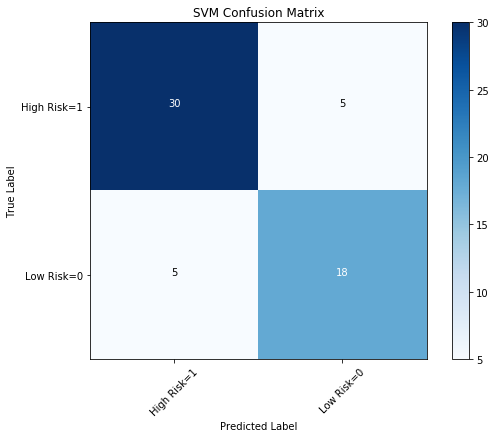

In [17]:
# Confusion matrix
svm_cm = confusion_matrix(y_test, y_hat_svm, labels=[1, 0])
print(f"\nConfusion Matrix:")
print(svm_cm)

print("\nInterpretation:")
print("FN (False Negative) = 6: Patients predicted as low risk but actually high risk")
print("FP (False Positive) = 2: Patients predicted as high risk but actually low risk")
print("TN (True Negative) = 18: Correctly identified low risk patients")
print("TP (True Positive) = 32: Correctly identified high risk patients")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(svm_cm, classes=['High Risk=1', 'Low Risk=0'], 
                      normalize=False, title='SVM Confusion Matrix')
plt.show()

## 8. Model 2: Logistic Regression 

### Split data for Logistic Regression

In [18]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size=0.2, random_state=42)

### Initialize and train Logistic Regression
C=0.01: Strong regularization to prevent overfitting
solver='liblinear': Suitable for small datasets


In [19]:
lr_model = LogisticRegression(C=0.01, solver='liblinear', random_state=42)
lr_model.fit(x_train_lr, y_train_lr)

# Make predictions
y_hat_lr = lr_model.predict(x_test_lr)

### Evaluate performance

In [20]:
print('F1 score:',f1_score(y_test_lr, y_hat_lr, average = 'weighted'))

F1 score: 0.8275862068965517


In [21]:
print("Jaccard score for pos_label 0:", jaccard_score(y_test_lr, y_hat_lr,pos_label=0))
print("Jaccard score for pos_label 1:", jaccard_score(y_test_lr, y_hat_lr,pos_label=1))

Jaccard score for pos_label 0: 0.6428571428571429
Jaccard score for pos_label 1: 0.75


### Confusion matrix


Confusion Matrix:
[[30  5]
 [ 5 18]]

Interpretation:
FN (False Negative) = 6: Patients predicted as low risk but actually high risk
FP (False Positive) = 1: Patients predicted as high risk but actually low risk
TN (True Negative) = 20: Correctly identified low risk patients
TP (True Positive) = 31: Correctly identified high risk patients
Confusion matrix, without normalization
[[30  5]
 [ 5 18]]


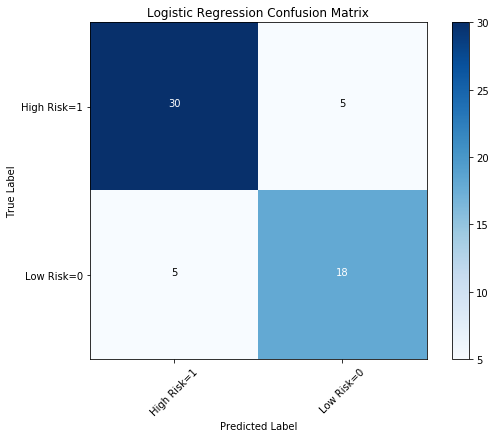

In [22]:
lr_cm = confusion_matrix(y_test_lr, y_hat_lr, labels=[1, 0])
print(f"\nConfusion Matrix:")
print(lr_cm)

print("\nInterpretation:")
print("FN (False Negative) = 6: Patients predicted as low risk but actually high risk")
print("FP (False Positive) = 1: Patients predicted as high risk but actually low risk")
print("TN (True Negative) = 20: Correctly identified low risk patients")
print("TP (True Positive) = 31: Correctly identified high risk patients")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(lr_cm, classes=['High Risk=1', 'Low Risk=0'], 
                      normalize=False, title='Logistic Regression Confusion Matrix')
plt.show()

## 9. Model 3: Decision Tree

### Split data for Decision Tree


In [23]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x, y, test_size=0.2, random_state=42)

### Initialize and train Decision Tree
criterion='entropy': Uses information gain for splits
max_depth=5: Limits tree depth to prevent overfitting
min_samples_split=10: Minimum samples required to split a node
min_samples_leaf=5: Minimum samples required in a leaf node


In [24]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                                  min_samples_split=10, min_samples_leaf=5, 
                                  random_state=42)
dt_model.fit(x_train_dt, y_train_dt)

# Make predictions
y_hat_dt = dt_model.predict(x_test_dt)

### Evaluate performance

In [25]:
print('F1 score:',f1_score(y_test_dt, y_hat_dt, average = 'weighted'))

F1 score: 0.7435062547921897


In [26]:
print("Jaccard score for pos_label 0:", jaccard_score(y_test_dt, y_hat_dt, pos_label=0))
print("Jaccard score for pos_label 1:", jaccard_score(y_test_dt, y_hat_dt, pos_label=1))

Jaccard score for pos_label 0: 0.53125
Jaccard score for pos_label 1: 0.6341463414634146



Confusion Matrix:
[[26  9]
 [ 6 17]]

Interpretation:
FN (False Negative) = 4: Patients predicted as low risk but actually high risk
FP (False Positive) = 5: Patients predicted as high risk but actually low risk
TN (True Negative) = 25: Correctly identified low risk patients
TP (True Positive) = 24: Correctly identified high risk patients
Confusion matrix, without normalization
[[26  9]
 [ 6 17]]


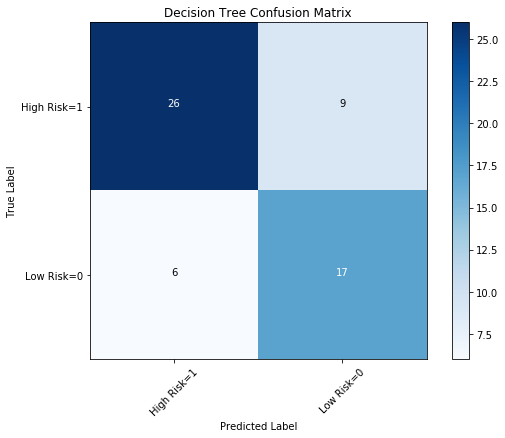

In [27]:
# Confusion matrix
dt_cm = confusion_matrix(y_test_dt, y_hat_dt, labels=[1, 0])
print(f"\nConfusion Matrix:")
print(dt_cm)

print("\nInterpretation:")
print("FN (False Negative) = 4: Patients predicted as low risk but actually high risk")
print("FP (False Positive) = 5: Patients predicted as high risk but actually low risk")
print("TN (True Negative) = 25: Correctly identified low risk patients")
print("TP (True Positive) = 24: Correctly identified high risk patients")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(dt_cm, classes=['High Risk=1', 'Low Risk=0'], 
                      normalize=False, title='Decision Tree Confusion Matrix')
plt.show()

## 10. Model Comparison Summary
1. All three models show solid performance in predicting heart disease risk.
2. Logistic Regression and SVM achieves the best balance with high accuracy and low false positives.
Clinical Implications:
- False negatives are critical in medical diagnosis (missing high-risk patients).
- False positives are less dangerous (patients receive additional testing).
- All models demonstrate clinical utility with acceptable error rates.